# **Introducción**
Argentina es uno de los países del mundo donde la población puede acceder a estudios universitarios de manera "gratuita", permitiendo una posibilidad de ascenso social (pasar de un segmento de población a uno de mayor nivel adquisitivo).
Las Universidades en Argentina se concentran principalmente en las grandes ciudades del país, como Buenos Aires, Córdoba, Rosario, Mendoza, entre otras, lo que hace que el acceso a las mismas sea restringido.
¿Cuánto hay de cierto en que el acceso a una educación superior permite tener un mejor nivel de vida?

La Ciudad de Buenos Aires realizaba antes de la pandemia una "Encuesta Hogares" que consistía en entrevistar un muestreo de hogares que permitiera extrapolar las conclusiones obtenidas sobre esa muestra de manera representativa para el resto de la Ciudad.

En esa encuesta se recopilaban datos de las familias, características demográficas, niveles de ingreso y niveles educativos alcanzados, entre otros. La más actualizada disponible es la del año 2019.


**Dataset**

---


El Dataset presenta datos de un relevamiento hecho en la Ciudad de Buenos Aires en el eño 2019. (Encuesta diseñada para que sus resultados puedan ser estadísticamente representativos de toda la Ciudad de Buenos Aires). En él hay información sobre los integrantes de los hogares relevados, su nivel educativo, comuna en la que viven, ingreso del hogar, ingreso per cápita, entre otros. Adicionalmente hya tablas con información de universidades y bibliotecas en la comuna de residencia de los integrantes del hogar.
Se analizará si existe relación entre los ingresos per cápita de cada hogar y el nivel educativo alcanzado, así como disponibilidad de universidades y bibliotecas en la comuna de residencia.


---
**Utilidad**
Este análisis podría servir al Ministerio de Educación para promover creación de universidades o nuevas sedes de universidades ya existentes, de comprobarse que exista una relación entre el nivel educativo alcanzado y el ingreso familiar per cápita.


---
**Hipótesis**

La hipótesis es que a mayor nivel educativo, mayor será el ingreso pér cápital. Y a su vez, que a mayor disponibilidad de Universidades y Bibliotecas en la comuna, mejor nivel educativo.


# **Importación de Dataset y Previsualización de datos**

In [ ]:
import pandas as pd
import numpy as np
#importo pandas y numpy

from google.colab import drive
import os
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive'
df_hog= pd.read_excel('Encuesta_hogares.xlsx')
df_hog.head()
#importo el excel del Dataset 1 "Encuesta hogares 2019"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


### **¿Cómo es el ingreso según el nivel educativo alcanzado?**

nivel_actual
Postgrado                              50025.72
Universitario                          28966.78
No corresponde                         28370.05
Terciario/superior no universitario    23864.56
Jardin maternal                        22251.62
Sala de 3                              18477.65
Primario comun                         16747.90
Secundario/medio comun                 16028.56
Sala de 4                              15766.82
Otras escuelas especiales              14848.52
Secundario/medio adultos               14777.79
Sala de 5                              14367.33
Primario especial                      13075.33
Primario adultos                        8374.11
Name: ingreso_per_capita_familiar, dtype: float64


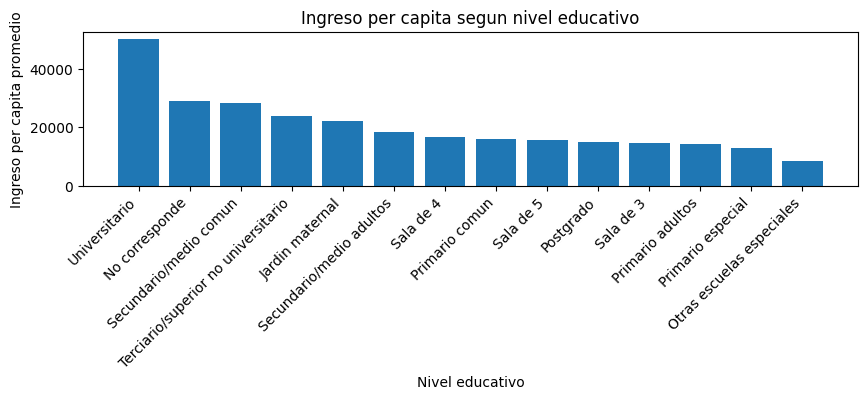

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Gráfico de promedio de ingreso per capita (eje y) por nivel educativo (eje x)
x = df_hog.nivel_actual.unique() #defino variable x
#print (x)

y= df_hog.ingreso_per_capita_familiar.groupby(df_hog.nivel_actual).mean().round(2) #defino variable y como promedio de ingreso per capita agrupado por nivel_actual
y = y.sort_values(ascending=False)
print (y)


fig,ax = plt.subplots(figsize=(10,2)) #configuro tamaño del gráfico
ax.bar(x,y) #hago gráfico de barras
ax.set_title('Ingreso per capita segun nivel educativo')
ax.set_ylabel('Ingreso per capita promedio')
ax.set_xlabel('Nivel educativo')

# Ordeno las etiquetas del eje x
ax.set_xticks(y.index)
ax.set_xticklabels(y.index, rotation=45, ha='right')

plt.xticks(rotation=45)
plt.show()

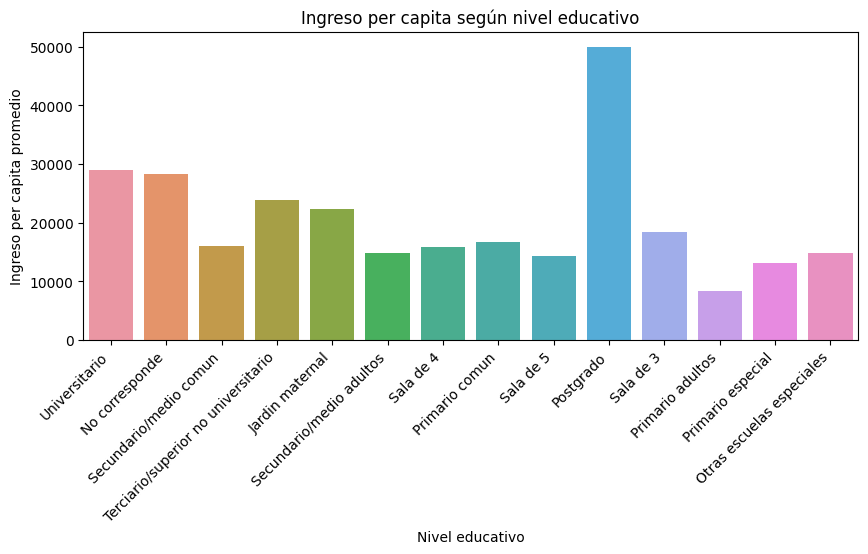

In [ ]:
#Mismo gráfico con seaborn para ver la diferencia

plt.figure(figsize=(10, 4)) #tamaño del gráfico
sns.barplot(x='nivel_actual', y='ingreso_per_capita_familiar', data=df_hog, errorbar=None, estimator=np.mean ) #se define eje x, eje y, dataframe, se sacan las barras de error, estimar según promedio

# Configuración del gráfico
plt.title('Ingreso per capita según nivel educativo') #título gráfico
plt.ylabel('Ingreso per capita promedio') #título eje y
plt.xlabel('Nivel educativo') #título eje x
plt.xticks(rotation=45, ha='right') #rotación de las leyendas del eje x a 45° a la derecha para que se lean bien

# Mostrar el gráfico
plt.show()

### **¿Cómo se distribuye la población según sexo?**

sexo
Mujer    7723
Varon    6596
Name: sexo, dtype: int64
['Mujer' 'Varon']


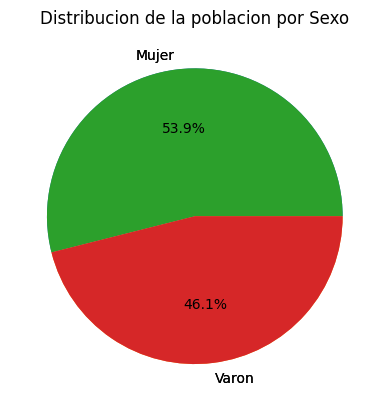

In [ ]:
#Gráfico de torta de Distribución por sexo
z = df_hog.sexo.groupby(df_hog.sexo).count()
print (z)
n = df_hog.sexo.unique()
print (n)

plt.pie(z,labels=n)
plt.pie(z, labels=n, autopct='%1.1f%%')
#ax.set_title('Distribucion de la poblacion por Sexo')
plt.title('Distribucion de la poblacion por Sexo')
plt.show()

### **¿Hay diferencia en el ingreso según el sexo?**

['Mujer' 'Varon']
sexo
Mujer    25713.101903
Varon    26752.744087
Name: ingreso_per_capita_familiar, dtype: float64


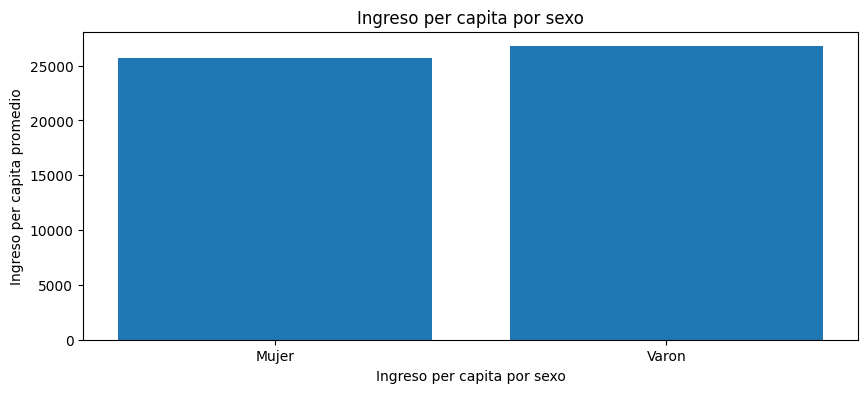

In [ ]:
#Gráfico de barras de ingreso per capita promedio por sexo
x = df_hog.sexo.unique() #defino variable x
print (x)

y= df_hog.ingreso_per_capita_familiar.groupby(df_hog.sexo).mean() #defino variable y como promedio de ingreso per capita agrupado por sexo
print (y)

fig,ax = plt.subplots(figsize=(10,4)) #configuro tamaño del gráfico
ax.bar(x,y,label='Ingreso per capita por sexo') #hago gráfico de barras
ax.set_title('Ingreso per capita por sexo')
ax.set_ylabel('Ingreso per capita promedio')
ax.set_xlabel('Ingreso per capita por sexo')
plt.show()

### **¿Cómo se distribuye la población según la residencia (dominio)?**

dominio
Resto de la Ciudad      12580
Villas de emergencia     1739
Name: dominio, dtype: int64
['Resto de la Ciudad' 'Villas de emergencia']


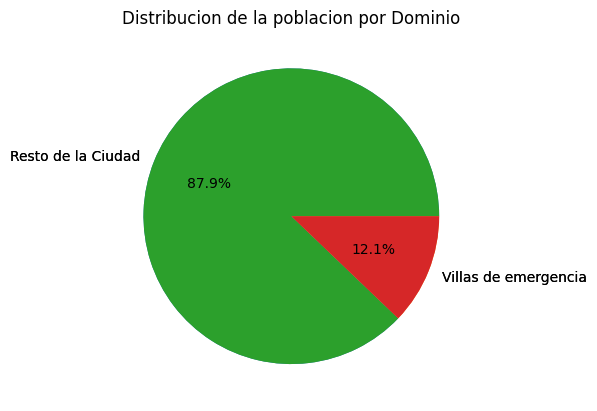

In [ ]:
#Gráfico de torta de Distribución por Dominio
z = df_hog.dominio.groupby(df_hog.dominio).count()
print (z)
n = df_hog.dominio.unique()
print (n)

plt.pie(z,labels=n)
plt.pie(z, labels=n, autopct='%1.1f%%')
#ax.set_title('Distribucion de la poblacion por Dominio')
plt.title('Distribucion de la poblacion por Dominio')
plt.show()

### **¿Hay diferencia en el ingreso según el lugar de residencia (dominio)?**

['Resto de la Ciudad' 'Villas de emergencia']
dominio
Resto de la Ciudad      28802.352226
Villas de emergencia     7308.680276
Name: ingreso_per_capita_familiar, dtype: float64


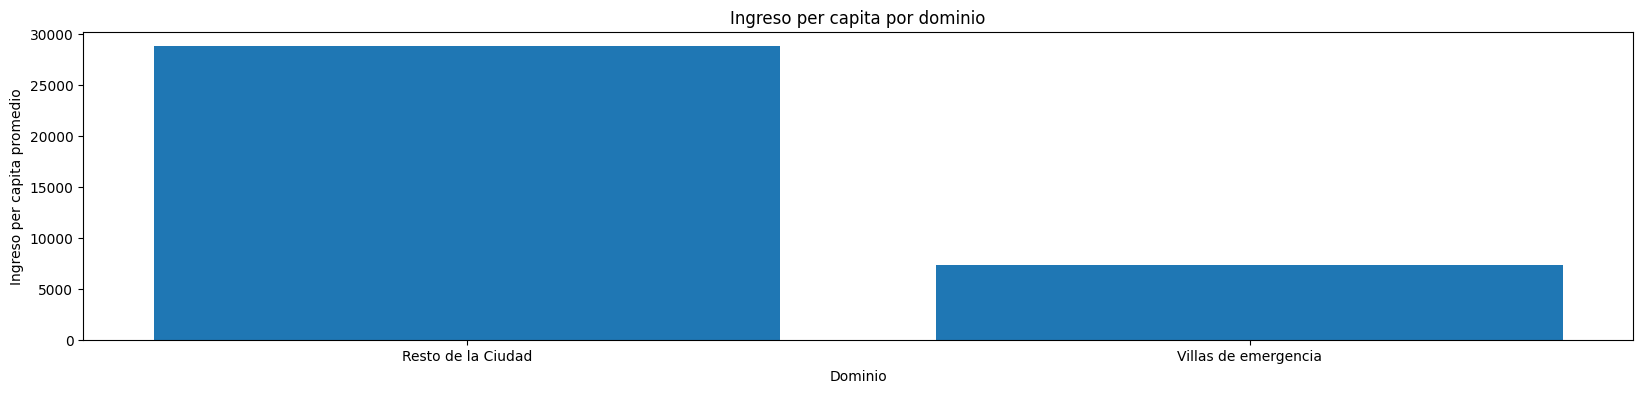

In [ ]:
#Gráfico de barras de ingreso per capita promedio por Dominio
x = df_hog.dominio.unique() #defino variable x
print (x)

y= df_hog.ingreso_per_capita_familiar.groupby(df_hog.dominio).mean() #defino variable y como promedio de ingreso per capita agrupado por Dominio
print (y)


fig,ax = plt.subplots(figsize=(20,4)) #configuro tamaño del gráfico
ax.bar(x,y,label='Ingreso per capita por dominio') #hago gráfico de barras
ax.set_title('Ingreso per capita por dominio')
ax.set_ylabel('Ingreso per capita promedio')
ax.set_xlabel('Dominio')
plt.show()

In [ ]:
# Filtrar el DataFrame por dominios específicos
ciudad = df_hog[df_hog['dominio'] == 'Resto de la Ciudad']
villas = df_hog[df_hog['dominio'] == 'Villas de emergencia']

# Calcular el ingreso per cápita promedio para cada dominio
ingreso_ciudad = ciudad['ingreso_per_capita_familiar'].mean()
ingreso_villas = villas['ingreso_per_capita_familiar'].mean()

# Calcular la diferencia porcentual
diferencia_porcentual = ((ingreso_ciudad - ingreso_villas) / ingreso_villas) * 100

# Imprimir el resultado
print(f'El ingreso per cápita en ciudad es aproximadamente un {abs(diferencia_porcentual):.2f}% mayor que en villas de emergencia.')

El ingreso per cápita en ciudad es aproximadamente un 294.08% mayor que en villas de emergencia.


### **¿Cómo es el ingreso según la edad de la población?**

[ 18  50  17  21   1  19  15  23  20  25  16  78  22  29  42   2  26   3
  24  33  63  61  49  60  93  41   4   0  32  11   7   9  55  54  27  12
  44   5  31  30  56  14   6  28  34  37  45  38  36  40   8  10  58  62
  52  35  77  51  81  71  69  73  13  46  86  43  47  48  39  68  72  66
  70  84  57  59  53  67  76  99  75  64  90  79  74  87  92  65  82  94
  80  91  89  85  95  83  97  88  98  96 100]
edad
0      15543.750000
1      17850.358108
2      16489.126582
3      18332.106250
4      15328.412429
           ...     
96     22000.000000
97     23611.111111
98     37437.500000
99     24739.000000
100    82000.000000
Name: ingreso_per_capita_familiar, Length: 101, dtype: float64


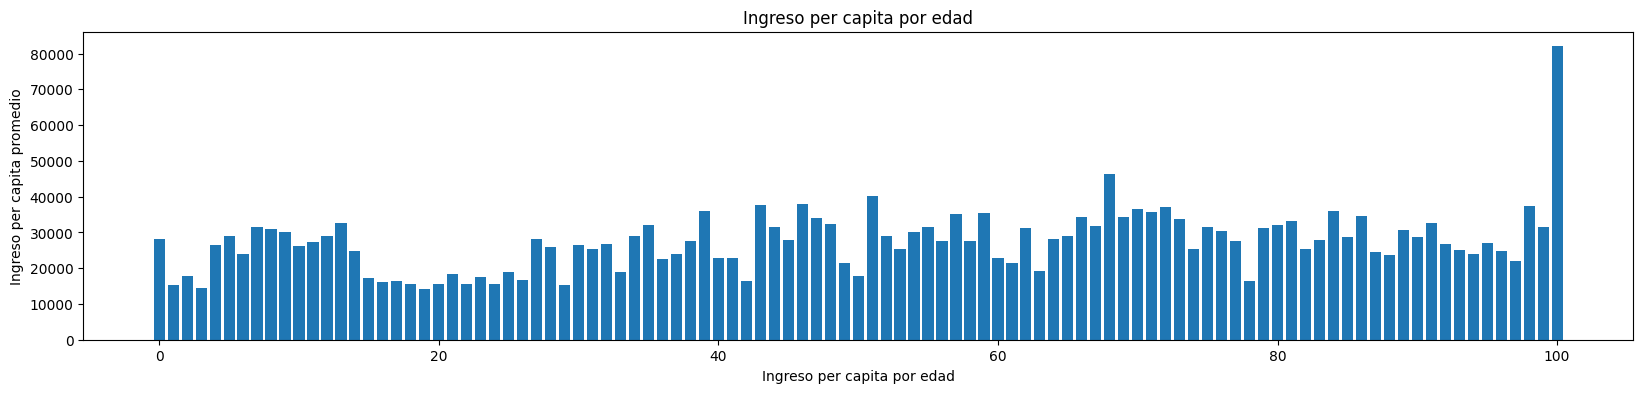

In [ ]:
#Gráfico de barras de ingreso per capita promedio por edad
x = df_hog.edad.unique() #defino variable x
print (x)

y= df_hog.ingreso_per_capita_familiar.groupby(df_hog.edad).mean() #defino variable y como promedio de ingreso per capita agrupado por sexo
print (y)

fig,ax = plt.subplots(figsize=(20,4)) #configuro tamaño del gráfico
ax.bar(x,y,label='Ingreso per capita por edad') #hago gráfico de barras
ax.set_title('Ingreso per capita por edad')
ax.set_ylabel('Ingreso per capita promedio')
ax.set_xlabel('Ingreso per capita por edad')
plt.show()

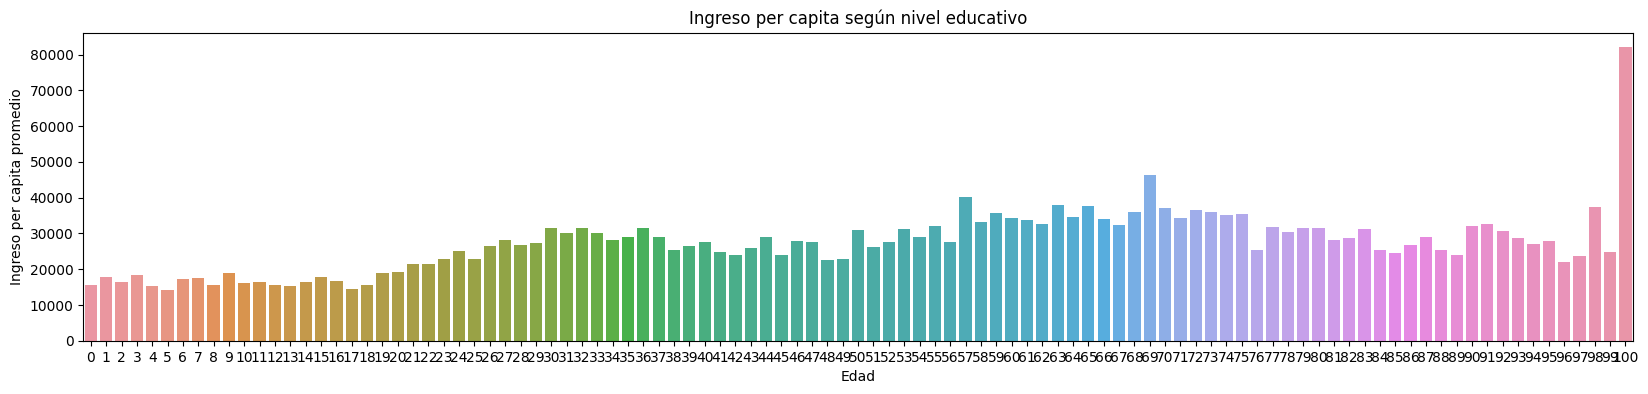

In [ ]:

plt.figure(figsize=(20, 4)) #tamaño del gráfico
sns.barplot(x='edad', y='ingreso_per_capita_familiar', data=df_hog, errorbar=None, estimator=np.mean ) #se define eje x, eje y, dataframe, se sacan las barras de error, estimar según promedio

# Configuración del gráfico
plt.title('Ingreso per capita según nivel educativo') #título gráfico
plt.ylabel('Ingreso per capita promedio') #título eje y
plt.xlabel('Edad') #título eje x
#plt.xticks(rotation=45, ha='right') #rotación de las leyendas del eje x a 45° a la derecha para que se lean bien

# Mostrar el gráfico
plt.show()

# **Conclusiones al momento**



In [ ]:

df_hog.describe().round(2)

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar
count,14319.00,14319.00,14319.00,14319.00,14319.00,14319.00,14319.00,14319.00,14319.00,14319.00
mean,2710.02,1.01,2.14,7.62,38.82,20078.63,6016.23,26094.86,70212.82,26192.01
std,1535.91,0.13,1.35,4.24,23.11,34698.17,16065.35,37152.50,62685.68,27463.91
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1473.00,1.00,1.00,4.00,20.00,0.00,0.00,0.00,30000.00,10500.00
50%,2611.00,1.00,2.00,8.00,37.00,2500.00,0.00,16000.00,54000.00,19900.00
75%,3898.00,1.00,3.00,11.00,57.00,30000.00,4000.00,37000.00,90000.00,33500.00
max,5795.00,7.00,19.00,15.00,100.00,1000000.00,500000.00,1000000.00,1000000.00,1000000.00


**Insights al momento**

De analizar el resultado de la función describe() sale lo siguiente:

La edad promedio de los encuestados es de 38,8 años (casi 39). La escala va desde 0 a 100.

Ingreso per cápita promedio para la Ciudad de Buenos Aires es de 26.192.

De los gráficos:

*   El 53,9% de la población son mujeres
*   El 87,9% de la población vive en barrios, el 12,1% en villas de emergencia.
*   El ingreso per capita promedio en los barrios es de 28802.35 mientras que ne las Villas de emergencia es de 7308.68. Esto significa que quienes viven en barrios tienen ingresos 209% mayores que quienes viven en villas.

*   Por nivel educativo, quienes tienen los mayores ingresos son quienes hicieron un Posgrado (máximo nivel educativo presente en los datos).
*   En principio, no se ve una diferencia representativa de ingreso según sexo.









# **Análisis de correlación**

In [ ]:
#Hago la conversión de variables categóricas con Label Encode
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = LabelEncoder()
df_hog["nivel_actual2"] = le.fit_transform(df_hog["nivel_actual"])
df_hog["sexo2"] = le.fit_transform(df_hog["sexo"])
df_hog["dominio2"] = le.fit_transform(df_hog["dominio"])
#print(list(le.classes_))

df_hog.head(5)

#Matriz de correlación
matriz_corr = df_hog.corr()
#print (matriz_corr)
corr_ingreso = matriz_corr['ingreso_per_capita_familiar'].sort_values(ascending=False)
print(corr_ingreso)

ingreso_per_capita_familiar    1.000000
ingresos_familiares            0.748419
ingresos_totales               0.730149
ingreso_total_lab              0.623617
ingreso_total_no_lab           0.341636
edad                           0.204149
id                             0.126253
comuna                         0.080766
sexo2                          0.018869
nhogar                        -0.024518
nivel_actual2                 -0.091465
miembro                       -0.207755
dominio2                      -0.255647
Name: ingreso_per_capita_familiar, dtype: float64


<ipython-input-49-bf5f0841c227>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df_hog.corr()
